In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv("/content/retail_store_sales_data.csv")


In [4]:
df.head()

,StoreID,StoreLocation,AnnualSales,NumberOfEmployees,MonthlyFootTraffic,CustomerSatisfactionScore,AverageTransactionValue,OperatingHours,StoreSize,ProductVariety
0,1,Urban,765951.617844,8,7509.409098,5.997531,219.688047,9-5,346.424362,100
1,2,Suburban,970260.353170,19,4177.683775,9.706365,138.874730,11-7,291.921515,137
2,3,NaN,472994.222706,47,4494.583873,8.463078,256.652304,10-6,844.609463,168
3,4,Suburban,419841.833555,26,5574.808511,8.850156,445.311051,11-7,889.861148,99
4,5,Suburban,139476.186790,41,2180.563539,NaN,440.451917,10-6,419.352320,95


In [5]:
df.shape

(3123, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3123 entries, 0 to 3122
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StoreID                    3123 non-null   int64  
 1   StoreLocation              2811 non-null   object 
 2   AnnualSales                3123 non-null   float64
 3   NumberOfEmployees          3123 non-null   int64  
 4   MonthlyFootTraffic         3123 non-null   float64
 5   CustomerSatisfactionScore  2811 non-null   float64
 6   AverageTransactionValue    3123 non-null   float64
 7   OperatingHours             2811 non-null   object 
 8   StoreSize                  3123 non-null   float64
 9   ProductVariety             3123 non-null   int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 244.1+ KB


In [7]:
df.isnull().sum()


StoreID                        0
StoreLocation                312
AnnualSales                    0
NumberOfEmployees              0
MonthlyFootTraffic             0
CustomerSatisfactionScore    312
AverageTransactionValue        0
OperatingHours               312
StoreSize                      0
ProductVariety                 0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(2277, 10)

In [10]:
df.describe()

,StoreID,AnnualSales,NumberOfEmployees,MonthlyFootTraffic,CustomerSatisfactionScore,AverageTransactionValue,StoreSize,ProductVariety
count,2277.000000,2277.000000,2277.000000,2277.000000,2277.000000,2277.000000,2277.000000,2277.000000
mean,1560.465525,540091.402803,27.146245,5424.662367,5.457169,257.912155,554.308917,110.870883
std,903.932364,259316.073308,12.639977,2620.483553,2.602048,138.630931,261.703116,52.381794
min,1.000000,100812.956969,5.000000,1001.353430,1.001863,20.303924,100.824144,20.000000
25%,773.000000,319341.003496,16.000000,3121.890940,3.202547,139.453569,326.383471,65.000000
50%,1548.000000,537718.254745,27.000000,5381.757722,5.472106,252.848793,552.833672,113.000000
75%,2352.000000,764093.155526,38.000000,7692.131208,7.738572,377.854374,783.471925,155.000000
max,3123.000000,999967.616688,49.000000,9999.801566,9.998148,499.904696,999.909758,199.000000


In [11]:
df=pd.get_dummies(df,columns=['StoreLocation'],drop_first=True)

In [12]:
df.shape

(2277, 11)

In [13]:
from sklearn.preprocessing import StandardScaler
Scalar=StandardScaler()
scaled_features=Scalar.fit_transform(df.drop(columns=['StoreID','OperatingHours']))

In [14]:
df.columns

Index(['StoreID', 'AnnualSales', 'NumberOfEmployees', 'MonthlyFootTraffic',
       'CustomerSatisfactionScore', 'AverageTransactionValue',
       'OperatingHours', 'StoreSize', 'ProductVariety',
       'StoreLocation_Suburban', 'StoreLocation_Urban'],
      dtype='object')

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
features = ['AnnualSales', 'NumberOfEmployees', 'MonthlyFootTraffic',
            'CustomerSatisfactionScore', 'AverageTransactionValue',
            'StoreSize', 'ProductVariety'] + [col for col in df.columns if 'StoreLocation_' in col]


In [17]:
# Normalize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

In [18]:
from sklearn.cluster import KMeans
kmeans=KMeans()
kmeans.fit(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans()

In [19]:
#Using the Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [20]:
import matplotlib.pyplot as plt

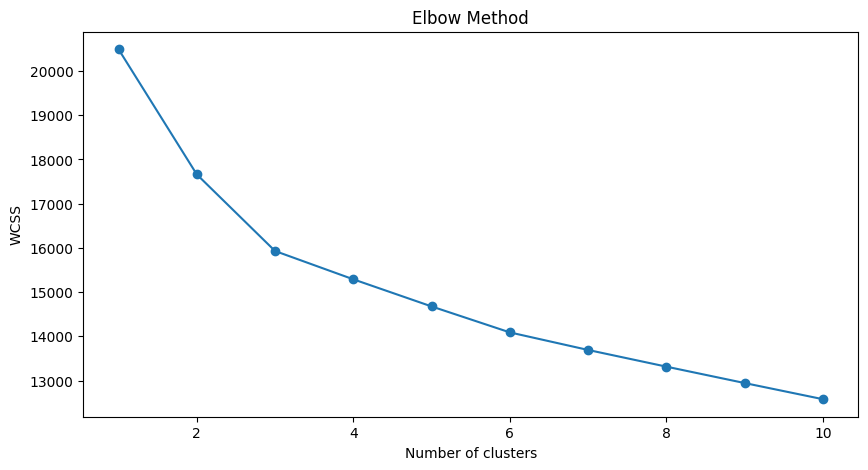

In [21]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [31]:
kmeans=KMeans(n_clusters=3,random_state=0)
clusters=kmeans.fit_predict(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [32]:
df['Cluster']=clusters

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

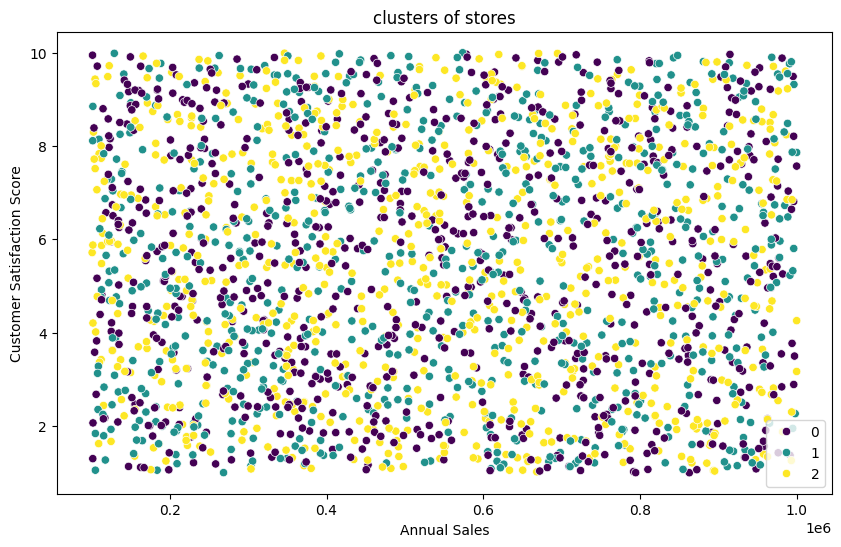

In [33]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='AnnualSales',y='CustomerSatisfactionScore',hue='Cluster',palette='viridis',data=df)
plt.title("clusters of stores")
plt.xlabel("Annual Sales")
plt.ylabel("Customer Satisfaction Score")
plt.legend()
plt.show()

In [26]:
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_columns.remove('StoreID')  # Excluding StoreID as it is an identifier, not a feature
cluster_summary = df.groupby('Cluster')[numeric_columns].mean()
print(cluster_summary)

           AnnualSales  NumberOfEmployees  MonthlyFootTraffic  \
Cluster                                                         
0        452187.572165          29.659483         6023.817558   
1        733415.359234          26.879781         3006.816885   
2        458732.922288          31.274436         5768.427441   
3        611074.001341          24.880150         4667.596552   
4        561717.250490          27.069231         5096.004448   
5        572473.720789          23.069959         5556.274101   
6        565852.683129          27.975207         6000.347127   
7        298191.159766          27.062500         5392.417517   
8        476802.839193          31.497382         4406.402752   
9        704317.994054          21.572973         8286.851516   

         CustomerSatisfactionScore  AverageTransactionValue   StoreSize  \
Cluster                                                                   
0                         3.782338               152.474103  662.5206

**Additional**

In [27]:
kmeans.fit_predict(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([3, 1, 7, ..., 0, 9, 8], dtype=int32)

In [28]:
y_predict=kmeans.predict(scaled_features)

In [29]:
y_predict

array([3, 1, 7, ..., 0, 9, 8], dtype=int32)

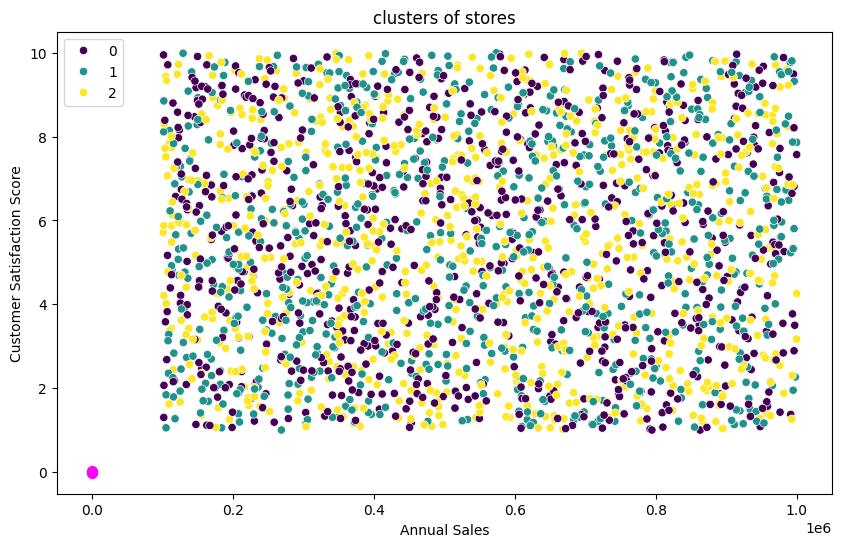

In [35]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='AnnualSales',y='CustomerSatisfactionScore',hue='Cluster',palette='viridis',data=df)
# Pass only the x and y coordinates of cluster centers
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=50, c="magenta")
plt.title("clusters of stores")
plt.xlabel("Annual Sales")
plt.ylabel("Customer Satisfaction Score")
plt.legend()
plt.show()